In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
adata = sc.read("mm_nk.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 14103 × 48361
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'batch', 'label', 'new_label', 'condition'

In [4]:
adata.obs.new_label.value_counts()

NK exhausted    6550
NK resident     6067
Others          1486
Name: new_label, dtype: int64

In [5]:
adata = adata[adata.obs.new_label != "Others"]

In [6]:
adata.obs.new_label.value_counts()

NK exhausted    6550
NK resident     6067
Name: new_label, dtype: int64

# Test with log-normalized counts

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/jacopo/miniconda3/envs/scanpy_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
adata_t = adata.copy()
adata_wx = adata.copy()
#adata_logreg = adata.copy()

In [9]:
sc.tl.rank_genes_groups(adata_t, groupby = "new_label", method =  "t-test", pts=True)

In [10]:
sc.tl.rank_genes_groups(adata_wx, groupby = "new_label", method =  "wilcoxon", pts=True)

In [11]:
adata_t.uns["rank_genes_groups"]

{'params': {'groupby': 'new_label',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'pts':               NK exhausted  NK resident
 A1BG              0.035725     0.041536
 A1BG-AS1          0.006412     0.009065
 A1CF              0.000000     0.000000
 A2M               0.030229     0.017142
 A2M-AS1           0.163511     0.095764
 ...                    ...          ...
 bP-21264C1.2      0.000305     0.000659
 bP-2171C21.3      0.000000     0.000000
 bP-2189O9.3       0.000000     0.000000
 hsa-mir-1253      0.000000     0.000000
 hsa-mir-423       0.000000     0.000000
 
 [48361 rows x 2 columns],
 'pts_rest':               NK exhausted  NK resident
 A1BG              0.041536     0.035725
 A1BG-AS1          0.009065     0.006412
 A1CF              0.000000     0.000000
 A2M               0.017142     0.030229
 A2M-AS1           0.095764     0.163511
 ...                    ...          ...
 bP-21264C1.2  

In [12]:
#sc.tl.rank_genes_groups(adata_logreg, groupby = "label", method =  "logreg")

In [13]:
adata_t_genes = pd.DataFrame(adata_t.uns["rank_genes_groups"]["names"])
adata_t_padj = pd.DataFrame(adata_t.uns["rank_genes_groups"]["pvals_adj"])
adata_t_lfg = pd.DataFrame(adata_t.uns["rank_genes_groups"]["logfoldchanges"])
adata_t_score = pd.DataFrame(adata_t.uns["rank_genes_groups"]["scores"])

adata_t_pts = pd.DataFrame(adata_t.uns["rank_genes_groups"]["pts"])

adata_t_DEG = pd.DataFrame()
adata_t_DEG["Symbol"] = adata_t_genes["NK exhausted"]
adata_t_DEG["pvals_adj"] = adata_t_padj["NK exhausted"]
adata_t_DEG["logfoldchanges"] = adata_t_lfg["NK exhausted"]
adata_t_DEG["abs_lfc"] = adata_t_lfg["NK exhausted"].abs()
adata_t_DEG["scores"] = adata_t_score["NK exhausted"]
adata_t_DEG = adata_t_DEG.set_index("Symbol")

adata_t_DEG = pd.merge(adata_t_DEG, adata_t_pts,left_index=True, right_index=True)

adata_t_DEG = adata_t_DEG[adata_t_DEG["pvals_adj"] < 0.05]
adata_t_DEG = adata_t_DEG[adata_t_DEG["abs_lfc"] >= 0.3]

adata_t_DEG.to_csv("DEG_mm_t.csv", index_label="Symbol")

In [14]:
adata_wx_genes = pd.DataFrame(adata_wx.uns["rank_genes_groups"]["names"])
adata_wx_padj = pd.DataFrame(adata_wx.uns["rank_genes_groups"]["pvals_adj"])
adata_wx_lfg = pd.DataFrame(adata_wx.uns["rank_genes_groups"]["logfoldchanges"])
adata_wx_score = pd.DataFrame(adata_wx.uns["rank_genes_groups"]["scores"])

adata_wx_pts = pd.DataFrame(adata_wx.uns["rank_genes_groups"]["pts"])
adata_wx_DEG = pd.DataFrame()
adata_wx_DEG["Symbol"] = adata_wx_genes["NK exhausted"]
adata_wx_DEG["pvals_adj"] = adata_wx_padj["NK exhausted"]
adata_wx_DEG["logfoldchanges"] = adata_wx_lfg["NK exhausted"]
adata_wx_DEG["abs_lfc"] = adata_wx_lfg["NK exhausted"].abs()
adata_wx_DEG["scores"] = adata_wx_score["NK exhausted"]
adata_wx_DEG = adata_wx_DEG.set_index("Symbol")

adata_wx_DEG = pd.merge(adata_wx_DEG, adata_wx_pts,left_index=True, right_index=True)

adata_wx_DEG = adata_wx_DEG[adata_wx_DEG["pvals_adj"] < 0.05]
adata_wx_DEG = adata_wx_DEG[adata_wx_DEG["abs_lfc"] >= 0.3]
adata_wx_DEG.to_csv("DEG_mm_wx.csv", index_label="Symbol")

In [15]:
adata_wx_DEG

,pvals_adj,logfoldchanges,abs_lfc,scores,NK exhausted,NK resident
CD74,1.826638e-187,1.222894,1.222894,29.545267,0.744885,0.506346
HLA-DRB1,3.612449e-151,1.934345,1.934345,26.529049,0.423511,0.169441
CD63,5.023873e-133,1.005026,1.005026,24.895563,0.756336,0.525630
KLRC2,6.225020e-131,2.126876,2.126876,24.696770,0.387023,0.154277
CCL5,3.857672e-115,0.729414,0.729414,23.175863,0.895725,0.846382
...,...,...,...,...,...,...
EIF1,3.372893e-147,-0.592830,0.592830,-26.176809,0.924122,0.972639
NFKBIA,2.089189e-151,-1.446610,1.446610,-26.556509,0.365191,0.565189
ZFP36,8.732133e-152,-1.392657,1.392657,-26.597672,0.387481,0.597000
IER2,1.403613e-163,-1.112258,1.112258,-27.608873,0.550229,0.726389


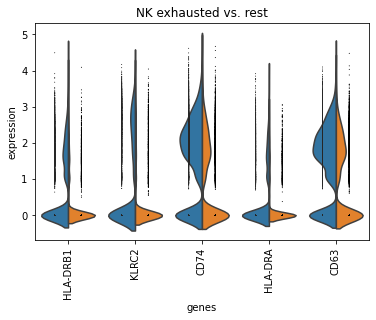

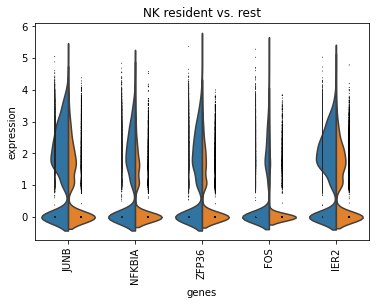

In [16]:
sc.pl.rank_genes_groups_violin(adata_t,  n_genes=5, jitter=False)

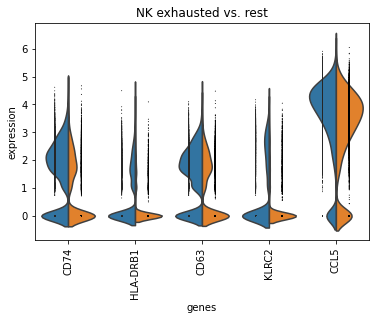

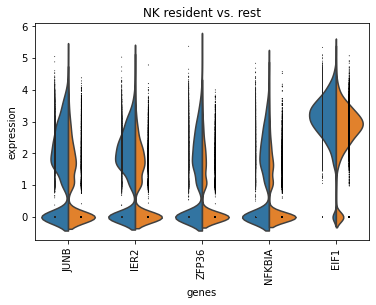

In [17]:
sc.pl.rank_genes_groups_violin(adata_wx,  n_genes=5, jitter=False)

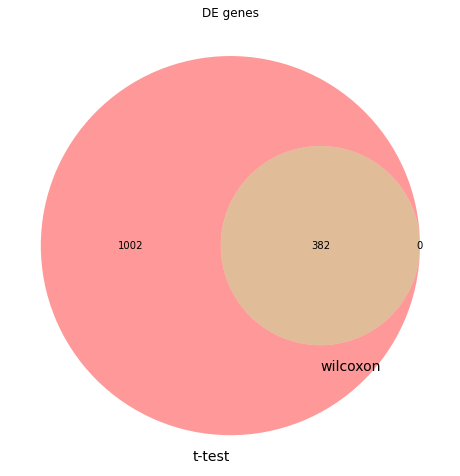

In [18]:

plt.figure(figsize=(8,10))
v = venn2([set(adata_t_DEG.index.to_list()), 
       set(adata_wx_DEG.index.to_list())],
       set_labels=('t-test', 'wilcoxon')
     )
plt.title("DE genes")

for text in v.set_labels:
    text.set_fontsize(14)